In [2]:
from konlpy.tag import Kkma, Komoran, Okt, Mecab
import pandas as pd
import numpy as np

mec = Mecab("C:/mecab/mecab-ko-dic")
okt = Okt()
kkm = Kkma()
kom = Komoran()
data = pd.read_csv('./save_data/naver_review_puretext.csv')

In [3]:
#임의문장 2개 추출
sentence1 = data.loc[199907,'review']
print(1, sentence1)
sentence2 = data.loc[199906,'review']
print(2, sentence2)

1 아직 사용해보지도않았고 다른 제품을 써본적이없어서 잘 모르겠지만 ㅎㅎ 배송은 빨랐습니다
2 넘이쁘고 쎄련되보이네요~


In [4]:
#일반적인 문장 (띄어쓰기가 적당히 돼있음)
print('mecab')
print(mec.pos(sentence1),end='\n\n')
print('okt')
print(okt.pos(sentence1),end='\n\n')
print('kkm')
print(kkm.pos(sentence1),end='\n\n')
print('komoran')
print(kom.pos(sentence1),end='\n\n')

mecab
[('아직', 'MAG'), ('사용', 'NNG'), ('해', 'XSV+EC'), ('보', 'VX'), ('지', 'EC'), ('도', 'JX'), ('않', 'VX'), ('았', 'EP'), ('고', 'EC'), ('다른', 'MM'), ('제품', 'NNG'), ('을', 'JKO'), ('써', 'VV+EC'), ('본', 'VX+ETM'), ('적', 'NNB'), ('이', 'JKS'), ('없', 'VA'), ('어서', 'EC'), ('잘', 'MAG'), ('모르', 'VV'), ('겠', 'EP'), ('지만', 'EC'), ('ㅎㅎ', 'IC'), ('배송', 'NNG'), ('은', 'JX'), ('빨랐', 'VA+EP'), ('습니다', 'EF')]

okt
[('아직', 'Adverb'), ('사용', 'Noun'), ('해보지도', 'Verb'), ('않았고', 'Verb'), ('다른', 'Noun'), ('제품', 'Noun'), ('을', 'Josa'), ('써', 'Verb'), ('본적', 'Noun'), ('이', 'Josa'), ('없어서', 'Adjective'), ('잘', 'Verb'), ('모르겠지만', 'Verb'), ('ㅎㅎ', 'KoreanParticle'), ('배송', 'Noun'), ('은', 'Josa'), ('빨랐습니다', 'Adjective')]

kkm
[('아직', 'MAG'), ('사용하', 'VV'), ('어', 'ECS'), ('보', 'VV'), ('지', 'ECD'), ('도', 'JX'), ('않', 'VXV'), ('았', 'EPT'), ('고', 'ECE'), ('다른', 'MDT'), ('제품', 'NNG'), ('을', 'JKO'), ('쓰', 'VV'), ('어', 'ECS'), ('본적', 'NNG'), ('이', 'JKS'), ('없', 'VA'), ('어서', 'ECD'), ('잘', 'MAG'), ('모르', 'VV'), ('겠', 'EPT'), (

In [5]:
#okt의 형태소 정규화, 오타교정
print(okt.pos(sentence1, stem=True, norm=True))

[('아직', 'Adverb'), ('사용', 'Noun'), ('해보다', 'Verb'), ('않다', 'Verb'), ('다른', 'Noun'), ('제품', 'Noun'), ('을', 'Josa'), ('써다', 'Verb'), ('본적', 'Noun'), ('이', 'Josa'), ('없다', 'Adjective'), ('자다', 'Verb'), ('모르다', 'Verb'), ('ㅎㅎ', 'KoreanParticle'), ('배송', 'Noun'), ('은', 'Josa'), ('빨르다', 'Adjective')]


In [6]:
#일반적이지 않은 문장 (인터넷용어 '너무' -> '넘')
print('mecab')
print(mec.pos(sentence2),end='\n\n') #넘 MAG -> 일반부사로 잘 인식한 모습
print('okt')
print(okt.pos(sentence2),end='\n\n')
print('kkm')
print(kkm.pos(sentence2),end='\n\n') #넘을 명사로 인식하는 모습을 보임
print('komoran')
print(kom.pos(sentence2),end='\n\n')

mecab
[('넘', 'MAG'), ('이쁘', 'VA'), ('고', 'EC'), ('쎄', 'VA'), ('련', 'EC'), ('되', 'VV+EC'), ('보이', 'VV'), ('네요', 'EC'), ('~', 'SY')]

okt
[('넘', 'Verb'), ('이쁘고', 'Adjective'), ('쎄련', 'Adjective'), ('되', 'Verb'), ('보이네요', 'Verb'), ('~', 'Punctuation')]

kkm
[('넘', 'NNB'), ('이쁘', 'VV'), ('고', 'ECE'), ('쎄', 'VV'), ('련', 'EFQ'), ('되', 'VV'), ('어', 'ECS'), ('보이', 'VV'), ('네요', 'EFN'), ('~', 'SO')]

komoran
[('넘', 'NNG'), ('이쁘', 'VA'), ('고', 'EC'), ('쎄', 'VA'), ('려', 'EC'), ('ㄴ', 'JX'), ('되', 'VV'), ('보이', 'VV'), ('네요', 'EC'), ('~', 'SO')]



In [7]:
#오타교정의 경우, 너무의 뜻인 넘을 넘다로 해석하여 동사로 인식한 것을 볼 수 있음
print(okt.pos(sentence2, stem=True, norm=True))

[('넘다', 'Verb'), ('이쁘다', 'Adjective'), ('쎄다', 'Adjective'), ('되다', 'Verb'), ('보이다', 'Verb'), ('~', 'Punctuation')]


In [8]:
#긴 문장의 띄어쓰기가 없는 경우
sentence3 = sentence1.replace(' ','')

In [9]:
sentence3

'아직사용해보지도않았고다른제품을써본적이없어서잘모르겠지만ㅎㅎ배송은빨랐습니다'

In [10]:
print('mecab')
print(mec.pos(sentence3),end='\n\n')
print('okt')
print(okt.pos(sentence3),end='\n\n')
print('kkm')
print(kkm.pos(sentence3),end='\n\n')
print('komoran')
print(kom.pos(sentence3),end='\n\n') #띄어쓰기가 없는경우 인식하지 못함

mecab
[('아직', 'MAG'), ('사용', 'NNG'), ('해', 'XSV+EC'), ('보', 'VX'), ('지', 'EC'), ('도', 'JX'), ('않', 'VX'), ('았', 'EP'), ('고', 'EC'), ('다른', 'MM'), ('제품', 'NNG'), ('을', 'JKO'), ('써', 'VV+EC'), ('본', 'VX+ETM'), ('적', 'NNB'), ('이', 'JKS'), ('없', 'VA'), ('어서', 'EC'), ('잘', 'MAG'), ('모르', 'VV'), ('겠', 'EP'), ('지만', 'EC'), ('ㅎㅎ', 'IC'), ('배송', 'NNG'), ('은', 'JX'), ('빨랐', 'VA+EP'), ('습니다', 'EF')]

okt
[('아직', 'Adverb'), ('사용', 'Noun'), ('해보지도', 'Verb'), ('않았고', 'Verb'), ('다른', 'Noun'), ('제품', 'Noun'), ('을', 'Josa'), ('써', 'Verb'), ('본적', 'Noun'), ('이', 'Josa'), ('없어서', 'Adjective'), ('잘', 'Verb'), ('모르겠지만', 'Verb'), ('ㅎㅎ', 'KoreanParticle'), ('배송', 'Noun'), ('은', 'Josa'), ('빨랐습니다', 'Adjective')]

kkm
[('아직', 'MAG'), ('사용', 'NNG'), ('해보', 'VV'), ('지', 'ECD'), ('도', 'JX'), ('않', 'VXV'), ('았', 'EPT'), ('고', 'ECE'), ('다른', 'MDT'), ('제품', 'NNG'), ('을', 'JKO'), ('쓰', 'VV'), ('어', 'ECS'), ('본적', 'NNG'), ('이', 'JKS'), ('없', 'VA'), ('어서', 'ECD'), ('잘', 'MAG'), ('모르', 'VV'), ('겠', 'EPT'), ('지만', 'ECE'),

In [11]:
#오타가 있고 띄어쓰기가 안된 경우
sentence = '사용감이너무좋은재품이에요추천함니다'

In [12]:
print('mecab')
print(mec.pos(sentence),end='\n\n')
#함니다의 함을 동사파생접미사로 공부함과같은 함으로 인식함
#크게 사용함에있어서 문제되지 않는수준에서 형태소를 분석함
print('okt')
print(okt.pos(sentence, stem=True, norm=True),end='\n\n')
#사와 용감을 따로 인식하는 모습과 제품이라는 명사의 경우 인식하지 못한 모습
print('kkm')
print(kkm.pos(sentence),end='\n\n')
#재품과 하와 ㅁ니다, 모두 적절하게 인식하는 모습을 보임
print('komoran')
print(kom.pos(sentence),end='\n\n')
#재품을 각각의 명사로 인식하는 모습을 보임

mecab
[('사용', 'NNG'), ('감', 'XSN'), ('이', 'JKS'), ('너무', 'MAG'), ('좋', 'VA'), ('은', 'ETM'), ('재품', 'NNG'), ('이', 'VCP'), ('에요', 'EF'), ('추천', 'NNG'), ('함', 'XSV+ETN'), ('니다', 'EC')]

okt
[('사', 'Modifier'), ('용감', 'Noun'), ('이', 'Josa'), ('너무', 'Adverb'), ('좋다', 'Adjective'), ('은재', 'Noun'), ('품', 'Noun'), ('이에요', 'Josa'), ('추천', 'Noun'), ('하다', 'Verb')]

kkm
[('사용', 'NNG'), ('감', 'XSN'), ('이', 'JKS'), ('너무', 'MAG'), ('좋', 'VA'), ('은', 'ETD'), ('재품', 'NNG'), ('이', 'VCP'), ('에요', 'EFN'), ('추천', 'NNG'), ('하', 'XSV'), ('ㅁ니다', 'EFN')]

komoran
[('사용', 'NNG'), ('감', 'NNG'), ('이', 'JKS'), ('너무', 'MAG'), ('좋', 'VA'), ('은', 'ETM'), ('재', 'NNG'), ('품', 'NNG'), ('이', 'VCP'), ('에요', 'EC'), ('추천', 'NNG'), ('함', 'NNG'), ('니다', 'NNP')]



## 정리
#### mecab
띄어쓰기가 돼있지 않고, 오타가 있는 경우에도 무난한 성능을 보임

#### okt
오타수정과같은 특수한 기능이 있으나, 명사를 인식하는데 있어서 어려움을 보임

#### kkma
mecab보다는 아니지만 어느정도 무난한 성능을 보임
형태소를 일반적인 형태로 바꾸어 출력하는 기능도 있음

#### komoran
띄어쓰기가 없는 긴 문장에 대해서 전혀 인식하지 못함
오타가 있는 경우에도 인식에 오류가 많은 모습을 보임 

In [13]:
#소요시간 비교
import time
from tqdm import tqdm

def tagger_time(tagger, texts):
  time_sum = 0

  for sentence in tqdm(texts):
    t1 = time.time()
    try:
      tagger.morphs(sentence)
    except:
      pass
    t2 = time.time()

    time_sum += (t2 - t1)

  return time_sum

In [14]:
texts = data['review'][:500]
time_list = []

In [15]:
for tagger in [kkm, kom, okt, mec]:
    time_list.append(tagger_time(tagger,texts))

100%|█████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 15127.69it/s]


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

tagger = ['Kkma', 'Komoran', 'Okt', 'Mecab']

Text(0, 0.5, 'total seconds')

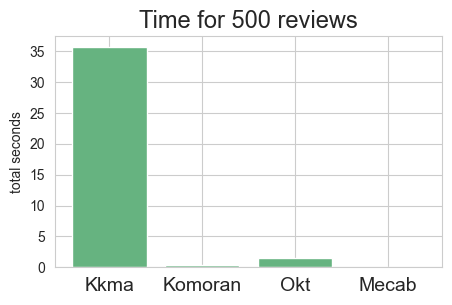

In [20]:
plt.figure(figsize=(5,3))
plt.bar(tagger, time_list, color=(0.4,0.7,0.5))
plt.title('Time for 500 reviews', fontsize=17)
plt.xticks(fontsize=14)
plt.ylabel('total seconds')